In [1]:
import numpy as np
import pandas as pd
import glob 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#create an empty dataframe for pub
#using loop process on glob.glob(*.csv) among all csv files extracted
#the loop goes through reading the csv file intp a df pandaframe 
#then it takes out all the rows which has 0 values under App/URL (this is to remove the summary info produced by DBM)
#then pub initially empty dataframe is appended with the extracted data 
#ignore_index=True is to remove the appending creating row number to be messed up
#then looping it again until all csv data is appended to pub
#--------------------------
pub = pd.DataFrame()
for file in glob.glob("*.csv"):
    df = pd.read_csv(file)
    df = df[df["App/URL"].isnull() == False]
    pub = pub.append(df, ignore_index=True)

C:\Program Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#setting exchange rate
#GBP > USD:
GBPtoUSD = 1.3
#GBPtoEUR:
GBPtoEUR = 1.17

In [4]:
pub = pub.drop(['Advertiser ID', 'Advertiser Status', 'Advertiser Integration Code', 'App/URL ID'], 1)

In [5]:
pub.columns = ['Month', 'Advertiser', 'URL', 'PublicInventory', 'Currency', 'Impressions', 'Clicks', 'Spend']
pub.Advertiser = pub.Advertiser.astype("category")

In [6]:
pub.loc[pub.Currency == "USD", "cSpend"] = pub.Spend / GBPtoUSD
pub.loc[pub.Currency == "EUR", "cSpend"] = pub.Spend / GBPtoEUR
pub.loc[pub.Currency == "GBP", "cSpend"] = pub.Spend

In [7]:
pub["AdvertiserNameX"] = pub.Advertiser.str.split("_").str[0]
pub["AdvertiserName"] = pub.AdvertiserNameX.str.lower()
pal = sns.color_palette(["#00afef"], 1)

In [12]:
def publisherSpend(x):
    c = pub[(pub.URL.str.contains(x +".co.uk")) | (pub.URL.str.contains(x +".com"))]
    cPMP = pub[(pub.URL.str.contains(x+".co.uk")) | (pub.URL.str.contains(x+".com"))][pub.PublicInventory == "No"]
    g = c.pivot_table(
        index="Month", values=["cSpend", "Impressions"], aggfunc=np.sum)
    month = np.unique(pub[pub.URL.str.contains(x)].Month)
    f, ax = plt.subplots(1, 1, figsize=[20, 5])
    chart = sns.barplot(data=g, x=month, y="cSpend", ax=ax, palette=pal)
    chart.set_xticklabels(month, rotation=75)
    print( x, "total spend from", month[0], "to", month[-1], "is: £", 
          "%.2f" % np.sum(c.cSpend), ";", "PMP spend is: £", "%.2f" % np.sum(cPMP.cSpend), ";",
          "%.2f" % ((np.sum(cPMP.cSpend)/np.sum(c.cSpend))*100),"%")

In [13]:
def publisherSpendPMP(x):
    c = pub[(pub.URL.str.contains(x +".co.uk")) | (pub.URL.str.contains(x +".com"))][pub.PublicInventory == "No"]
    g = c.pivot_table(
        index="Month", values=["Spend", "Impressions"], aggfunc=np.sum)
    month = np.unique(pub[pub.URL.str.contains(x)].Month)
    f, ax = plt.subplots(1, 1, figsize=[20, 5])
    chart = sns.barplot(data=g, x=month, y="Spend", ax=ax, palette=pal)
    chart.set_xticklabels(month, rotation=75)
    print( x, "total PMP spend from", month[0], "to", month[-1], "is:", 
          np.sum(c.Spend))

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


dailymail total spend from 2016/10 to 2017/03 is: £ 189224.12 ; PMP spend is: £ 169097.29 ; 89.36 %


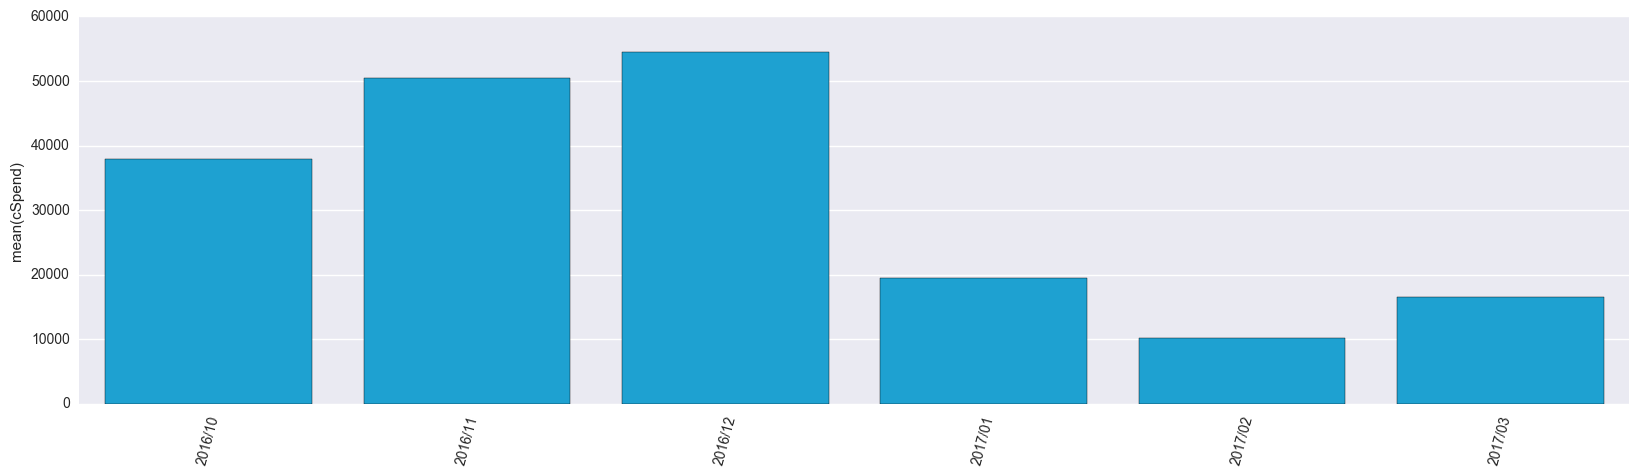

In [15]:
publisherSpend("dailymail")